# Байесовская статистика
## Задание BS.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов
* Задача 5 &mdash; 70 баллов
---

In [1]:
# Bot check

# HW_ID: ds_bs4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


__________________
### Задача 1.

Рассмотрим равномерное распределение на $A \subset \mathbb{R}^2$. Множество $A$ показано на рисунке закрашенными областями. Опишите процесс генерации выборки из этого распределения по схеме Гиббса или покажите, что это невозможно.

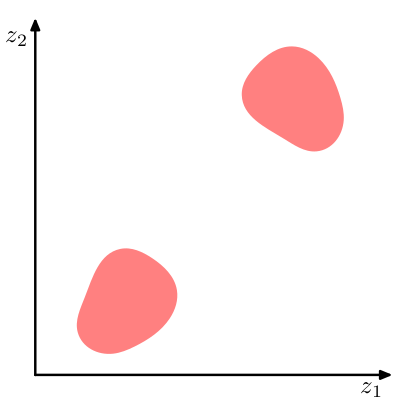

*Ключевая идея алгоритма Гиббса: оцениваем каждый параметр отдельно, основываясь на текущих значениях остальных. В нашем случае координата $z_2$ точки генерится из условного распределения по координате $z_1$ (и наоборот)*  
*Проблема в том, что А - это два "кластера", линейно разделимые вдоль осей координат. Попав в один "кластер", мы никогда из него не выйдем, т.к. по фиксированной координате $z_1$ доступны только значения $z_2$ из этого же кластера.*  
*Итог: по схеме Гиббса корректно семплировать выборку из А не получится*

---
### Задача 2.

Дано распределение на $\mathbb{R}^2$ с плотностью
$$p(x, y) = c\:\frac{\left|\sin(x+y)\right|\:\exp\left(-\left.|x|\right/10+\cos y\right)}{1+\left.|xy|\right/10},$$

где $c\in \mathbb{R}_+$ &mdash; некоторое число.

Сгенерируйте из него выборку размера $n=2000$ с помощью
* метода Rejection sampling,
* схемы Метрополиса-Хастингса.

В каждом случае нарисуйте ядерную оценку плотности полученной выборки и сравните ее с истинной плотностью.

<font color="red"><b>Замечания:</b></font>
    
1. Вместо $\mathbb{R}^2$ можно рассматривать только квадрат $[-10, 10]^2$.
2. Учтите, что схема Метрополиса-Хастингса требует настройки цепи на начальных итерациях, то есть около 1000 первых итераций необходимо отбросить. Кроме того, если требуется сгенерировать именно выборку, в которой элементы независимы, из полученной траектории стоит брать каждый $k$-й элемент, где $k$ хотя бы 10.
3. При сравнении методов учтите, что метод Rejection sampling может отвергать точки, в то время как в схеме Метрополиса-Хастингса точка добавляется на каждой итерации (повторяется или берется новая).
4. Процедуры семплирования необходимо реализовать самостоятельно.

По сгенерированной выборке оцените для данного распределения математическое ожидание и матрицу ковариаций.

In [3]:
def __pdf(x,y):  # временная ф-ция для подбора с
    return np.abs(np.sin(x+y)) * np.exp(-np.abs(x)/10 + np.cos(y)) / (1 + np.abs(x*y)/10)
c = 1 / (20*20*np.mean(__pdf(*sps.uniform(-10,20).rvs(size=(2,1_000_000)))))

def pdf(x, y):
    return c * np.abs(np.sin(x+y)) * np.exp(-np.abs(x)/10 + np.cos(y)) / (1 + np.abs(x*y)/10)

20*20*np.mean(pdf(*sps.uniform(-10,20).rvs(size=(2,1_000_000))))  # c подобрано так, чтобы интеграл плотности был близок к 1

0.9972933741465246

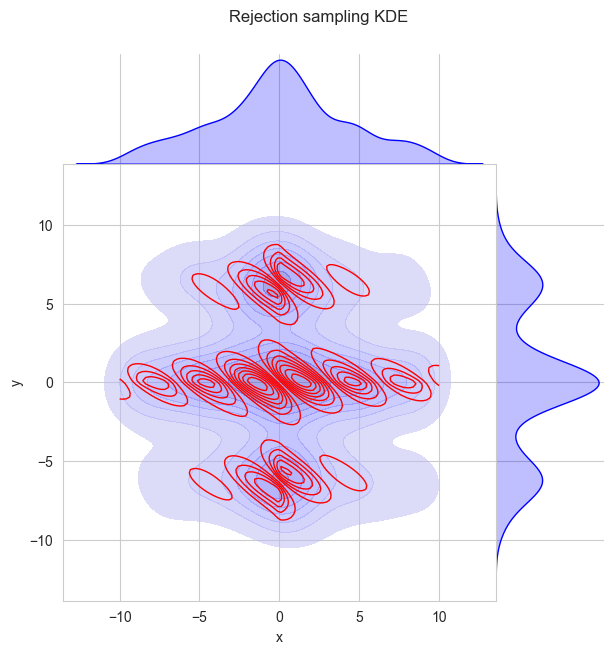

E: [ 0.009 -0.021]
cov:
[[18.265 -0.459]
 [-0.459 21.139]]


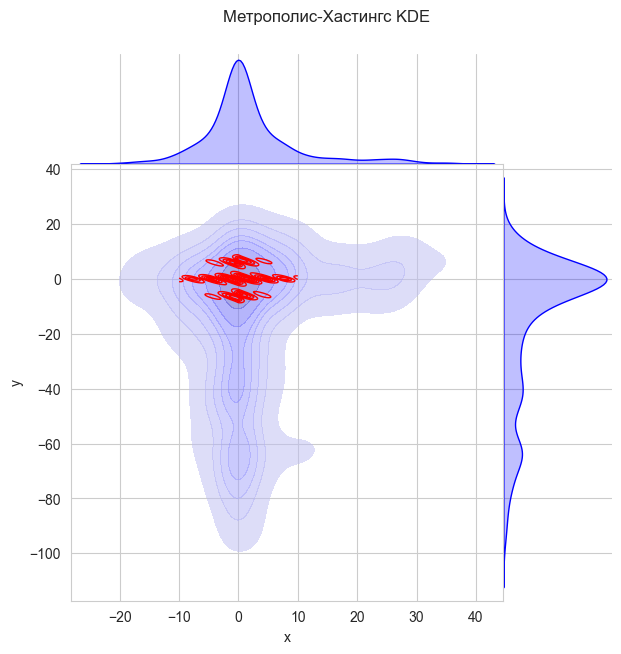

E: [  1.701 -16.537]
cov:
[[ 65.381  28.072]
 [ 28.072 672.666]]


In [4]:
def rej(n):  # rejection sampling
    samp = []
    while len(samp) < n:
        x_y = sps.uniform(-10,20).rvs(size=2)
        if np.random.uniform(0,1) < pdf(*x_y):
            samp.append(x_y)
    return np.stack(samp)

def mh(n, x_y=np.array([0,0])):  # Метрополис-Хастингс
    samp = []
    for _ in range(1000+n*10):  # 2е замечание
        x_y_new =  x_y + sps.norm(0,1).rvs(size=2)
        if np.random.uniform(0,1) < min(1, pdf(*x_y_new) / (pdf(*x_y) + 1e-9)):
            x_y = x_y_new
        samp.append(x_y)
    return np.stack(samp[1000:][::10])  # 2е замечание

for name,method in {'Rejection sampling':rej, 'Метрополис-Хастингс':mh}.items(): 
    samp = method(n=2000)
    x,y = samp[:,0], samp[:,1]
    fig = sns.jointplot(x=x, y=y, kind='kde', fill=True, color='blue', alpha=0.5, joint_kws=dict(levels=8), height=6, space=0, ratio=4)
    fig.set_axis_labels("x","y")
    fig.fig.suptitle(f'{name} KDE', y=1.05)
    X, Y = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
    Z = pdf(X,Y)
    # plt.imshow(Z, extent=[-10, 10, -10, 10], origin='lower', cmap='viridis')
    contours = plt.contour(X, Y, Z, colors='red', linewidths=1)  #истинную плотность показалось нагляднее изобразить контурами
    # plt.clabel(contours, inline=True, fontsize=10)  #подписи немного мешали восприятию
    plt.show()
    print(f'E: {(np.mean(samp, axis=0).round(3))}\ncov:\n{np.cov(x,y).round(3)}')


*Видно, что метод rejection sampling работает хорошо, а метод Метрополиса-Хастингса - похуже (почему-то много точек легли вне нашего квадрата)*

---
### Задача 3.

Для описанных ниже задач опишите математическую модель, постройте ее с помощью PyMC и ответьте на вопросы, используя семплирование.

1. Будем считать, что количество забитых голов некоторой команды в футбольном матче имеет пуассоновское распределение с параметром $\lambda$. На этот параметр задано априорное распределение $\Gamma(1.4, 1)$.

  За первый матч команде удалось забить 4 гола. Оцените апостериорный параметр $\lambda$. Какова вероятность того, что в следующем матче голов будет не меньше?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


Оценка апостериорной лямбды: 2.704
Вер-ть, что в след. матче голов будет не меньше: 0.275


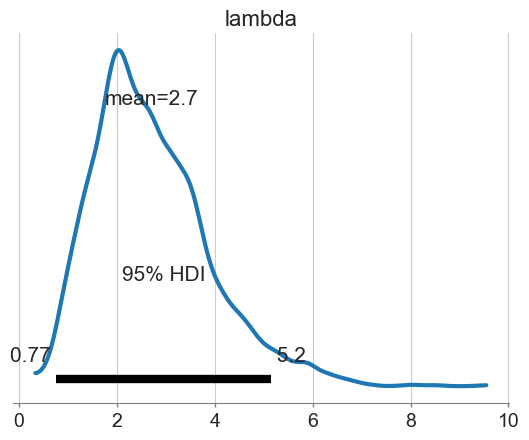

In [5]:
with pm.Model() as model:
    lambd = pm.Gamma("lambda", alpha=1.4, beta=1)
    goals = pm.Poisson("goals", mu=lambd, observed=4)
    tr = pm.sample(1000, tune=1000)
    lambda_posterior = tr.posterior["lambda"].values
    mean_lambda = np.mean(lambda_posterior)
    print(f"Оценка апостериорной лямбды: {mean_lambda:.3f}")
    print(f"Вер-ть, что в след. матче голов будет не меньше: {np.mean(np.random.poisson(mean_lambda,size=1000) >= 4)}")
    pm.plot_posterior(tr, linewidth=3, hdi_prob=0.95)
    plt.show()

2. Хотим посчитать количество медведей в лесу. Сначала поймали 23, поставили метку и отпустили. Через какое-то время поймали 19 медведей, из которых с меткой оказалось 4. Какое апостериорное распределение параметра &mdash; числа медведей?

  В качестве априорного используйте равномерное распределение на отрезке от 50 до 500

*Замечание:* https://en.wikipedia.org/wiki/Hypergeometric_distribution

*$X \sim Hypergeometric(N, 4, 23)$*

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [N]
>Metropolis: [X]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


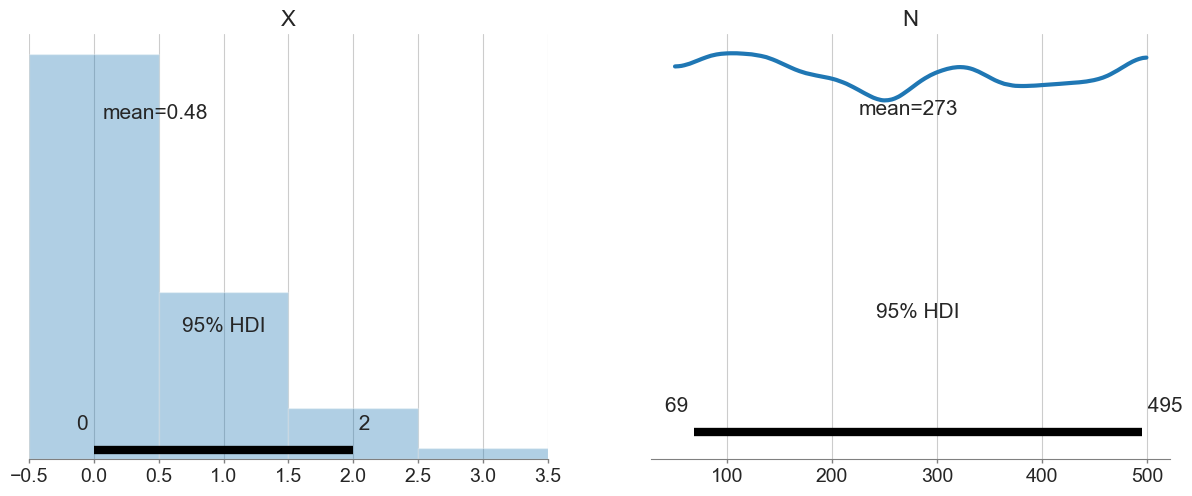

In [6]:
with pm.Model() as model:
    N = pm.Uniform('N', lower=50, upper=500)
    X = pm.HyperGeometric('X', N=N, n=23, k=4)
    tr = pm.sample(1000, tune=1000)
    pm.plot_posterior(tr, linewidth=3, hdi_prob=0.95)
    plt.show()

----

### Задача 4.

На занятии мы посмотрели на зависимость апостериорной вероятности $\mathsf{P}(\theta_1 < \theta_2\ |\ X, Y)$ от истинного эффекта. Исследуйте, как эта вероятность меняется при изменении размера выборки. Начиная с какого размера выборки эта вероятность становится больше 80% при истинном относительном эффекте 5%?

Как меняется требуемый размер выборки если в реализации критерия использовать распределение Стьюдента? Используйте для этого первую реализацию критерия с занятия.

Исследуйте зависимость $\mathsf{P}(\theta_1 < \theta_2\ |\ X, Y)$ от истинного эффекта если данные сгенерированны из распределения Стьюдента, а критерий использует нормальное распределение.

---
### Задача 5.

В Долгопрудном крупная торговая сеть имеет $100$ магазинов и планирует открыть еще $5$ магазинов. 

Первый этап &mdash; выбор места для открытия нового магазина среди множества потенциальных вариантов. Для этого аналитики компании построили ML-модель, которая на основе существующего множества магазинов предсказывает ожидаемую выручку магазина на основе различных географических факторов: плотность населения в некотором радиусе, величина пешеходного и транспортного потока, наличие рядом торговых центров и иных магазинов. Модель также оценивает степень уверенности в своем прогнозе.

Отлично, мы выбрали место для нового магазина, подготовились к окрытию и... открыли! Второй этап &mdash; оценка реальной успешности магазина. Но, поскольку магазин новый, он не сразу показывает ожидаемые значения выручки. В реальности выход магазина к ожидаемым показателям может занимать до 12-14 месяцев. Тем самым, такую оценку можно произвести в лучшем случае через год после открытия.

Тем не менее, спустя полгода работы можно прикинуть, достигнет ли магазин ожидаемых показателей. Если есть негативные опасения, то стоит проанализовать работу магазина. Возможно, его недостаточно прорекламировали, а может быть покупателям в нем что-то не понравилось.

Для составления прогноза на основе данных за каждый полгода можно спрогнозировать тренд роста выручки, а также можно использовать прогнозы ML-модели в качестве априорной информации. 

Предполагается, что тренд роста выручки магазина в первый год можно приближенно описать формулой
$$y_t = y_{\infty}\left[(1 - \gamma) \left( 1 - e^{-kt}\right) + \gamma\right] + \varepsilon_t,$$
где $y_{\infty}$ &mdash; ожидаемая выручка магазина в пределе, $\gamma \in (0, 1)$ &mdash; коэффициент выручки с первого месяца работы по отношению к предельному, $k \in [1/6, 1/4]$ &mdash; параметр формы кривой, $t$ &mdash; номер месяца с момента открытия (нумерация с 1), $\varepsilon_t$ &mdash; случайный шум. 

Подберите параметры априорного распределения выручки в пределе так, чтобы его математическое ожидание было равно ожидаемой выручке согласно ML-модели, а дисперсия опредялась степенью уверенности модели. Не берите слишком маленькую дисперсию, даже самое уверенное предсказание имеет погрешность не менее 10%. В качестве априорных распределений $\gamma$ и $k$ возьмите равномерные на соответствующей области значений. Априорное распределение шума выберите нормальным с нулевым средним и некоторой дисперсией, на которую тоже можно задать априорное распределение.

С помощью PyMC для каждого магазина постройте семплы из апостериорных распределений параметров $y_{\infty}, \gamma, k$. Далее по формуле тренда роста выручки получите семпл ожидаемой выручки через год после открытия для каждого магазина. Наконец, оцените вероятность того, что через год после открытия магазин достигнет уровня 80%, 90%, 100% от своей ожидаемой выручки.

In [7]:
expected = [92700, 212800, 49700, 80000, 462500]  # ожидаемая выручка согласно ML-модели
confidence = [0.92, 0.96, 0.76, 0.62, 0.48]  # степень уверенности ML-модели
data = pd.DataFrame(
    [[ 47580.07,  68817.26,  61583.18,  28341.77, 355656.42],
     [ 59487.94,  78042.15,  68282.65,  29684.57, 397649.98],
     [ 74656.72, 105193.11,  71588.68,  35201.27, 399673.09],
     [ 69145.22, 138103.96,  69242.53,  35444.95, 413788.36],
     [ 73360.78, 134696.74,  78585.76,  34829.87, 423585.50],
     [ 78408.82, 152144.24,  73533.09,  36262.02, 452980.44]],
    index=range(1,7)
)
data.columns.name, data.index.name = 'shops', 'months'
data

shops,0,1,2,3,4
months,,,,,
1,47580.07,68817.26,61583.18,28341.77,355656.42
2,59487.94,78042.15,68282.65,29684.57,397649.98
3,74656.72,105193.11,71588.68,35201.27,399673.09
4,69145.22,138103.96,69242.53,35444.95,413788.36
5,73360.78,134696.74,78585.76,34829.87,423585.50
6,78408.82,152144.24,73533.09,36262.02,452980.44


Магазин 0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_inf, gamma, k, eps]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 17 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


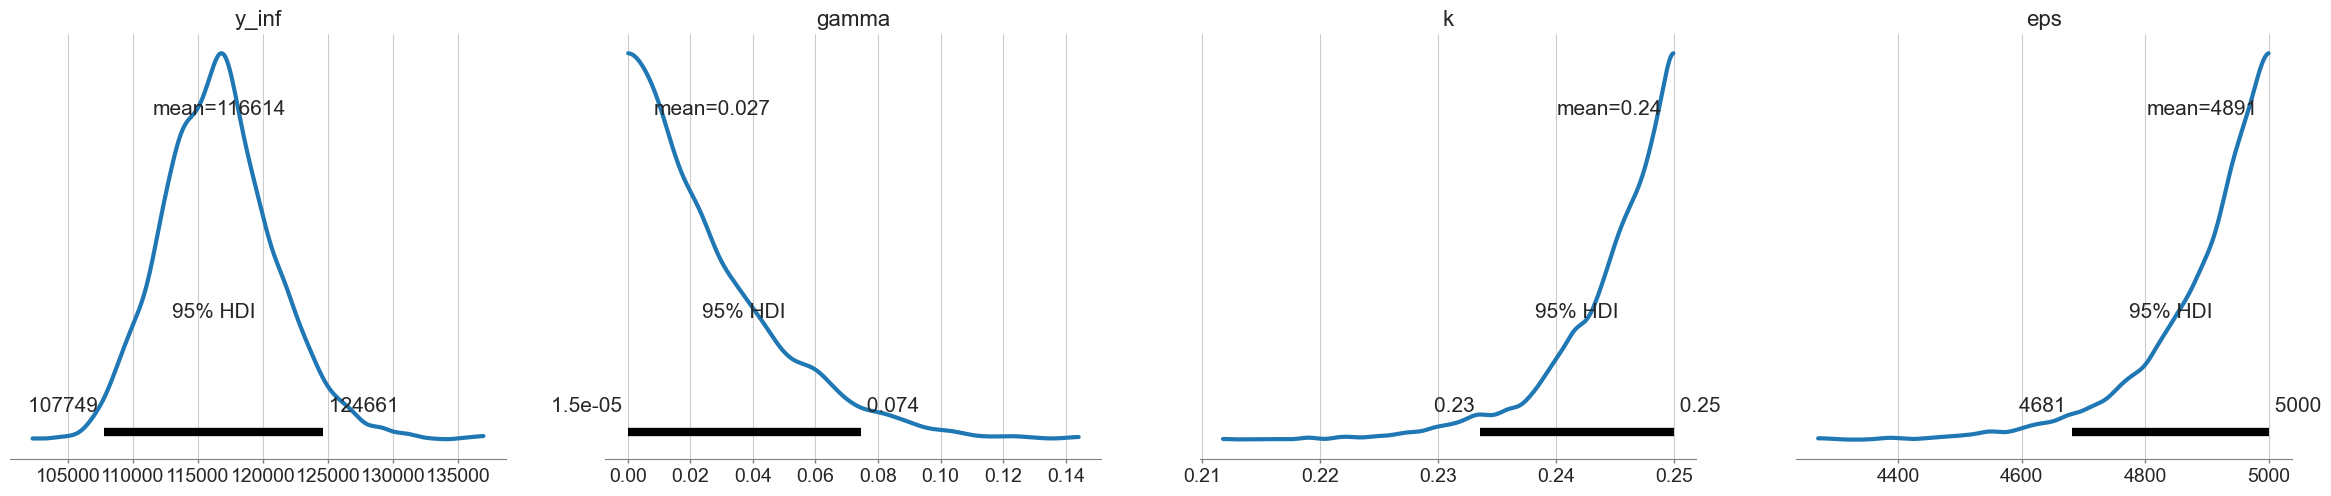

Sampling: [y_1, y_2, y_3, y_4, y_5, y_6]


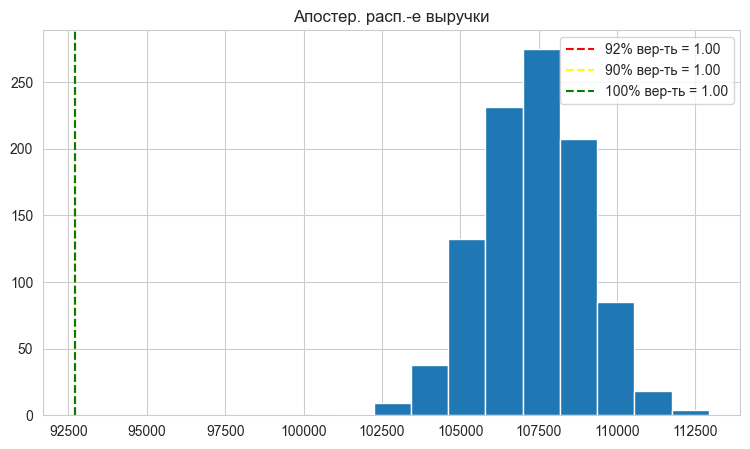

Магазин 1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_inf, gamma, k, eps]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 19 seconds.


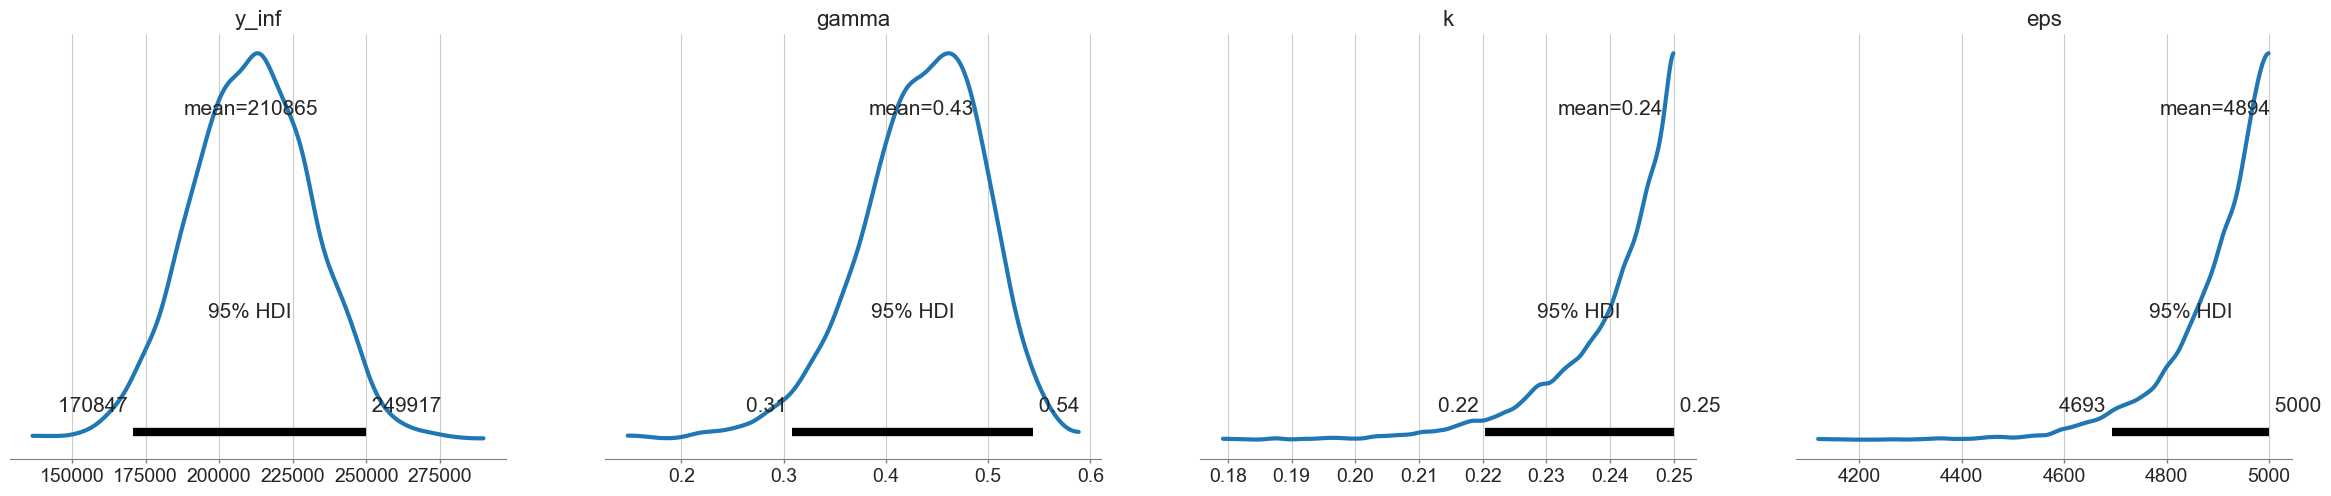

Sampling: [y_1, y_2, y_3, y_4, y_5, y_6]


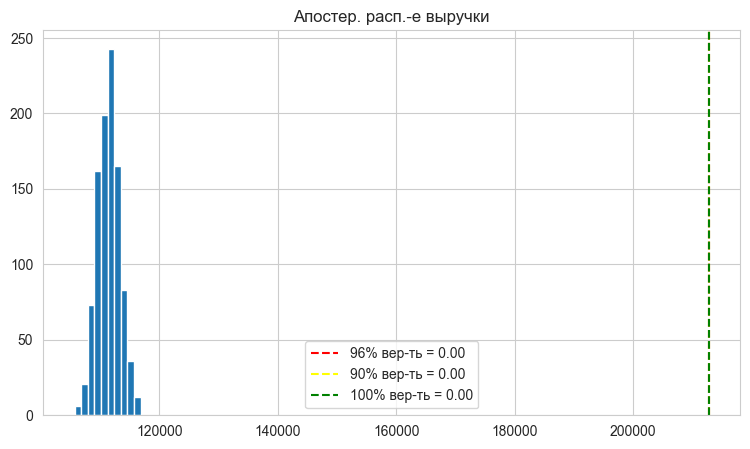

Магазин 2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_inf, gamma, k, eps]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 17 seconds.


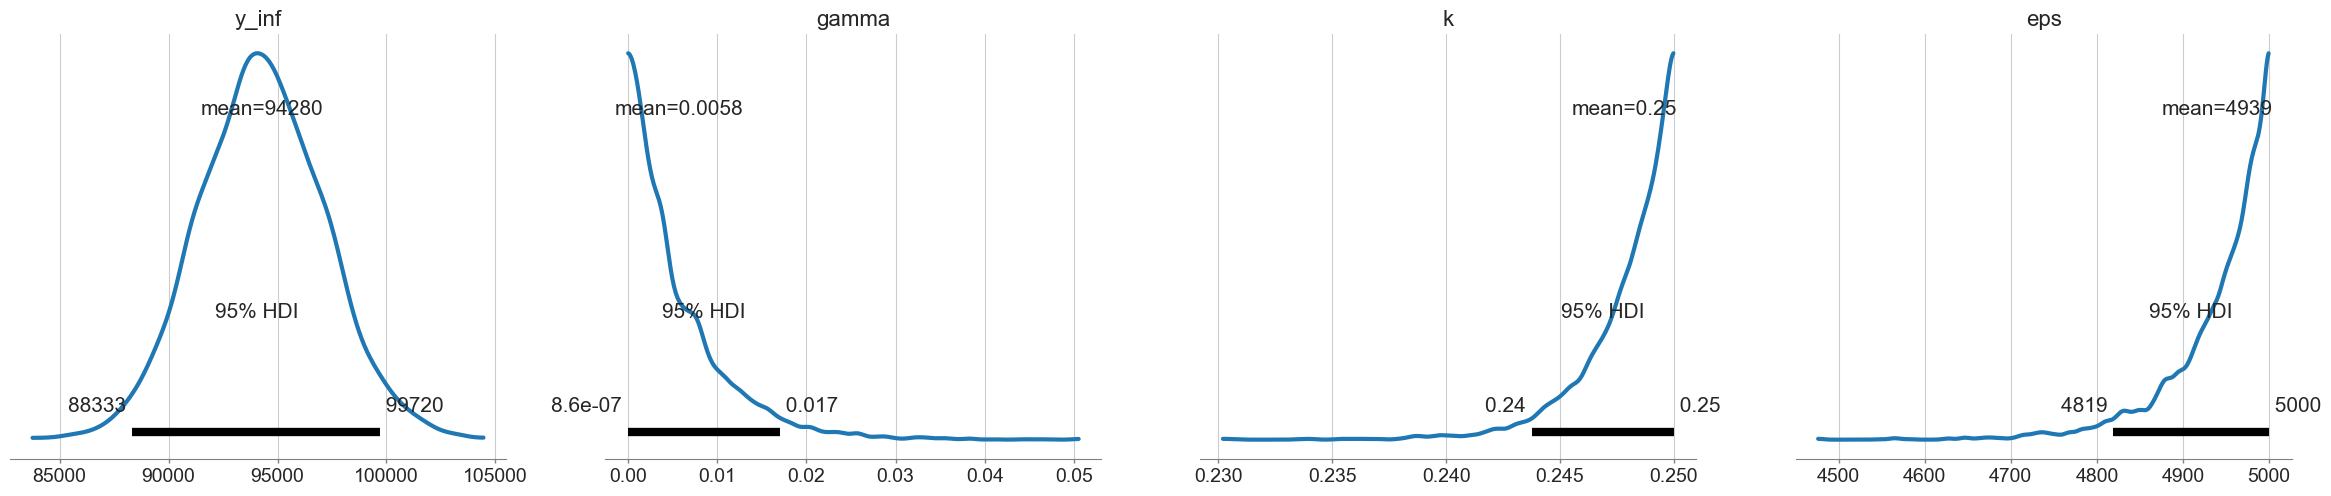

Sampling: [y_1, y_2, y_3, y_4, y_5, y_6]


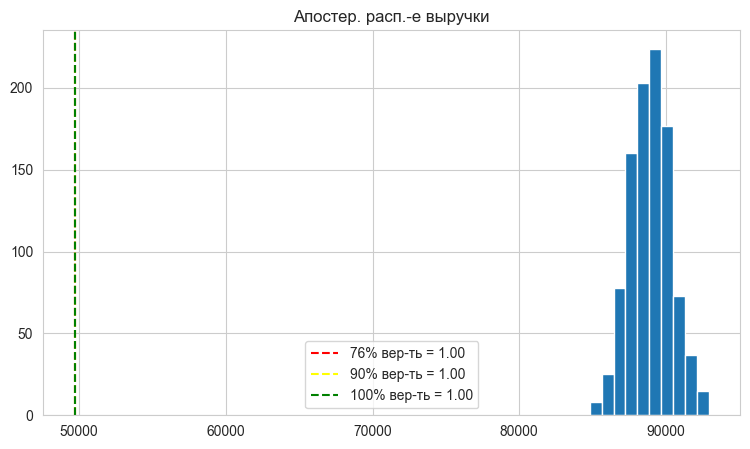

Магазин 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_inf, gamma, k, eps]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 17 seconds.


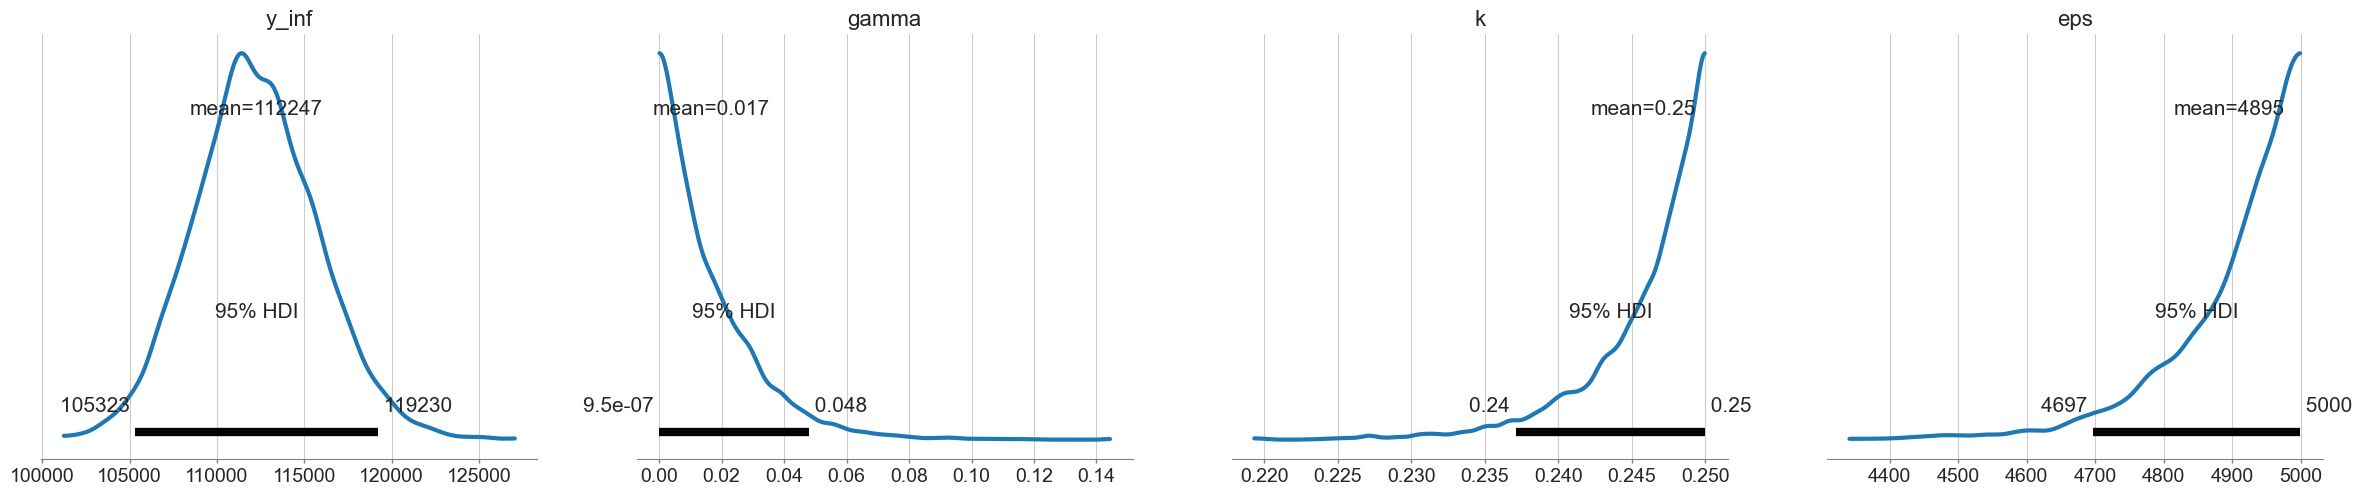

Sampling: [y_1, y_2, y_3, y_4, y_5, y_6]


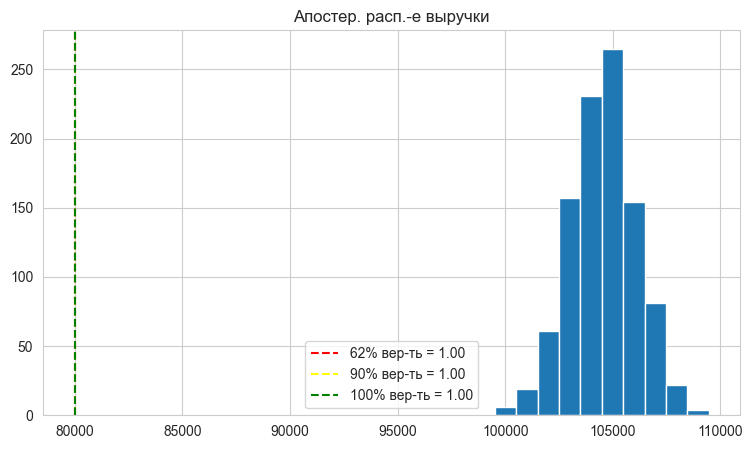

Магазин 4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_inf, gamma, k, eps]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 19 seconds.


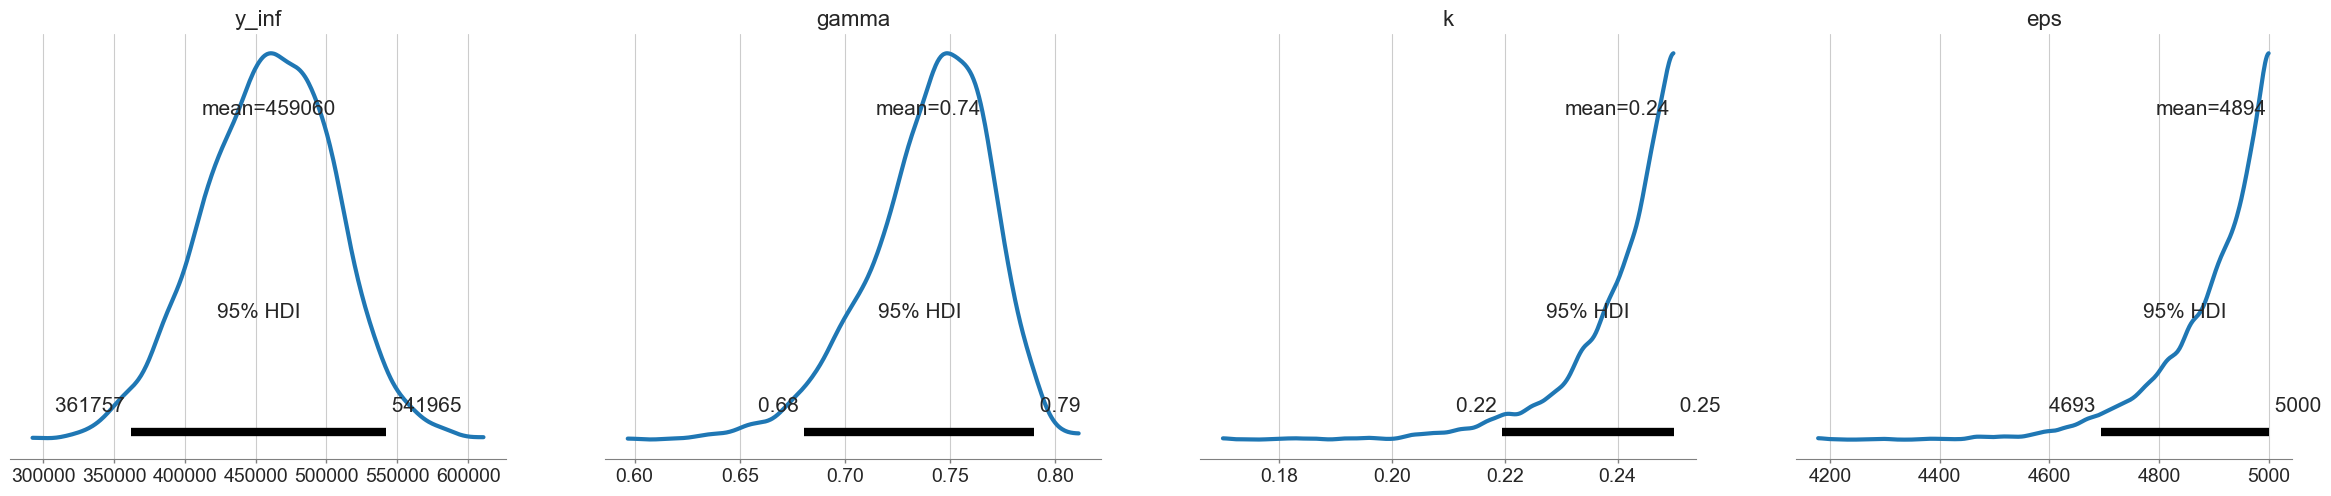

Sampling: [y_1, y_2, y_3, y_4, y_5, y_6]


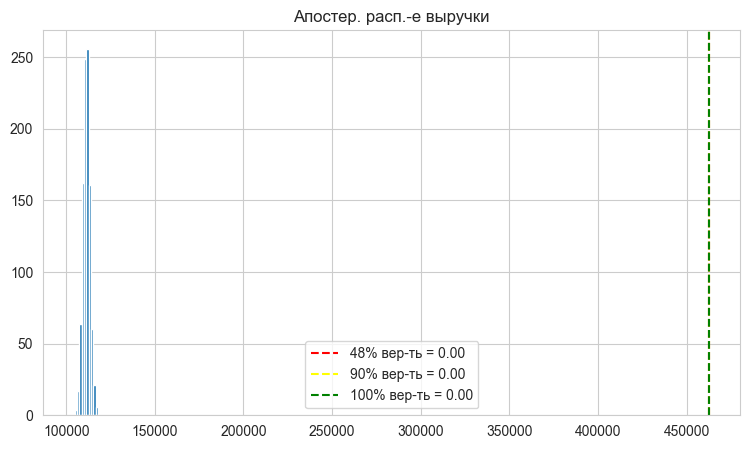

In [8]:
for shop in range(5):
    print(f'Магазин {shop}')
    with pm.Model() as model:
        y_inf = pm.Normal('y_inf', mu=expected[shop], sigma=expected[shop]*0.1)
        gamma,k,eps = pm.Uniform('gamma',lower=0,upper=1), pm.Uniform('k',lower=1/6,upper=1/4), pm.Uniform('eps',lower=1000,upper=5000)
        y = {t:pm.Normal(f'y_{t}', mu=y_inf*(1-gamma)*(1-pm.math.exp(-k*t))+gamma, sigma=eps, observed=data[0][t]) for t in range(1,7)}
        tr = pm.sample(1000, tune=500, cores=4)
        pm.plot_posterior(tr, linewidth=3, hdi_prob=0.95)
        plt.show()
        poster = pm.sample_posterior_predictive(tr)
        y_post = np.array(tr.posterior['y_inf']*(1-tr.posterior['gamma'])*(1-np.exp(-tr.posterior['k']*12))+tr.posterior['gamma']).mean(axis=0)
        plt.figure(figsize=(9,5))
        plt.title('Апостер. расп.-е выручки')
        plt.hist(y_post)
        for p,color in zip([int(confidence[shop]*100),90,100],['red','yellow','green']):
            plt.axvline(expected[shop], color=color, linestyle='--', label=f'{p}% вер-ть = {(y_post > expected[shop]*p/100).mean():.2f}')
        plt.legend()
        plt.show()

*Выводы:*  
*Можно рассчитывать на магазины 0,2,3 - у них все хорошо, рост опередил ожидания. Магазинам 1,4, кажется, нужна помощь\раскрутка*